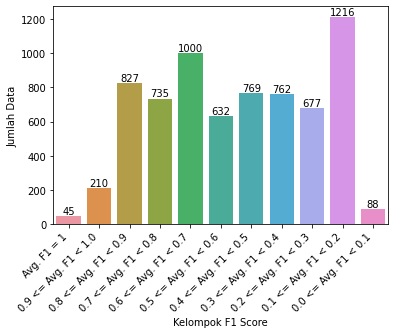

In [14]:
from Bio import Align
import os
import pandas as pd
training_data = os.path.join("workspace", "seqlab-latest", "train.csv")
prediction_data = os.path.join("prediction", "log", "prediction_log_complete.csv")

ranges = [
    (2.0, 1.0),
    (1.0, 0.9),
    (0.9, 0.8),
    (0.8, 0.7),
    (0.7, 0.6),
    (0.6, 0.5),
    (0.5, 0.4),
    (0.4, 0.3),
    (0.3, 0.2),
    (0.2, 0.1),
    (0.1, 0.0),
]

mainframe = pd.read_csv(prediction_data)
dataframes = [mainframe[(mainframe["avg_f1_score"] < r[0]) &(mainframe["avg_f1_score"] >= r[1])] for r in ranges]

import seaborn as sns
import matplotlib.pyplot as plt

cf_titles = [f"{r[1]} <= Avg. F1 < {r[0]}" for r in ranges]
cf_titles[0] = "Avg. F1 = 1"
pop_df = pd.DataFrame(data={
    "titles": cf_titles,
    "populations": [d.shape[0] for d in dataframes]
})
ax = sns.barplot(data=pop_df, x="titles", y="populations")
ax.set(xlabel="Kelompok F1 Score", ylabel="Jumlah Data")
ax.set_xticklabels(pop_df["titles"], rotation=45, ha="right")

for i in ax.containers:
    ax.bar_label(i,)

# plt.suptitle("Population Grouped by F1 Score")
plt.show()

In [22]:
from Bio import Align
import numpy as np
from tqdm import tqdm

aligner = Align.PairwiseAligner()

N_SAMPLE  = 45
samples_df = [d.sample(n=N_SAMPLE) for d in dataframes]
print(all([s.shape[0] == N_SAMPLE for s in samples_df]))
training_df = pd.read_csv(training_data)
training_seqs = training_df["sequence"].sample(10) # use sample to test code.
print(len(training_seqs))
# training_seqs = training_df["sequence"]

for d, t in zip(samples_df, cf_titles):
    pred_seqs = d["sequence"].tolist()
    indices = []
    values = []
    # for ps in tqdm(pred_seqs, total=len(pred_seqs), desc="Similarity Search"):
    for pred_seqs_index in range(N_SAMPLE):
        ps = pred_seqs[pred_seqs_index]
        ps_scores = []
        for ts in tqdm(training_seqs, total=len(training_seqs), desc=f"Computing Seq {pred_seqs_index + 1}"):
            alignments = aligner.align(ps, ts)
            scores = [a.score for a in alignments]
            ps_scores.append(np.max(scores))
            
        indices.append(np.argmax(ps_scores))
        values.append(np.max(ps_scores))
    _df = pd.DataFrame(data={
        "sequence": pred_seqs,
        "index": indices,
        "value": values
    })
    _df.to_csv(
        os.path.join("error_analysis", f"{t}.csv"),
        index=False
    )


True
10


Computing Seq 1:   0%|          | 0/10 [32:15<?, ?it/s]


KeyboardInterrupt: 

In [17]:
samples_df[0]["sequence"].sample(n=10)

86     TTTCAAACAACTCTAGGTGTAGATACATTTTCTGAGATATTCCAAG...
90     ACATTTTCTGAGATATTCCAAGGAGGAGGGACACAATTGGACCAGA...
105    TCCCATGCAGAAGGGGAATCTGGGCCCTGGTGTTAGAATTCAGTGT...
71     AATCTGACCCTCTGAGCAGCCGCAGGATATTCTAAGTCTTCCAAGA...
76     CTGATGGTCTGCAATCACATAGGATGATGCTTTCAAACAACTCTAG...
84     TGCAATCACATAGGATGATGCTTTCAAACAACTCTAGGTGTAGATA...
87     TTCAAACAACTCTAGGTGTAGATACATTTTCTGAGATATTCCAAGG...
96     CCAAGGAGGAGGGACACAATTGGACCAGATGTTAGAAGGACAGCTG...
85     TGATGCTTTCAAACAACTCTAGGTGTAGATACATTTTCTGAGATAT...
107    ATGCAGAAGGGGAATCTGGGCCCTGGTGTTAGAATTCAGTGTAATT...
Name: sequence, dtype: object